Problem: Predicting Credit Card Fraud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip -q install lineapy~=0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.3/209.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.8 MB/s eta 0:00:00


In [ ]:
%%capture

%matplotlib inline
%pip uninstall scikit-learn -y -q
%pip install imbalanced-learn==0.7.0 -q
%pip install imblearn -q

In [ ]:
%load_ext lineapy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set()

In [ ]:
import lineapy
lineapy.tag("Fraud Use Case")

Downloading the dataset

In [ ]:
file_path="/content/drive/MyDrive/fraud_usecase/fraud.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [ ]:
# The class has a weird string instead of a boolean or numbers 0 and 1, so convert it to 0 and 1

mapped_class = {"'0'": 0, "'1'": 1}
df['Class'] = df['Class'].map(lambda x: mapped_class[x])


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/lineapy/system_tracing/exec_and_record_function_calls.py", line 28, in exec_and_record_function_calls
    settrace(trace_func)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/lineapy/system_tracing/exec_and_record_function_calls.py", line 32, in exec_and_record_function_calls
    settrace(original_tr

In [ ]:
# Check if that worked

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
artifact = lineapy.save(df, 'load_data')

In [ ]:
print(artifact.get_code())

import pandas as pd

file_path = "/content/drive/MyDrive/fraud_usecase/fraud.csv"
df = pd.read_csv(file_path)
mapped_class = {"'0'": 0, "'1'": 1}
df["Class"] = df["Class"].map(lambda x: mapped_class[x])



In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print("Fraud Statistics")

avg_amt = df[df['Class']== 1]['Amount'].mean()
std_dev = df[df['Class']== 1]['Amount'].std()
max_amt = df[df['Class']== 1]['Amount'].max()

print(f"The average amount is {avg_amt}")
print(f"The std deviation for amount is {std_dev}")
print(f"The max amount is {max_amt}")

Fraud Statistics
The average amount is 122.21132113821139
The std deviation for amount is 256.6832882977121
The max amount is 2125.87


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
284315/(284315+492)

0.9982725143693799

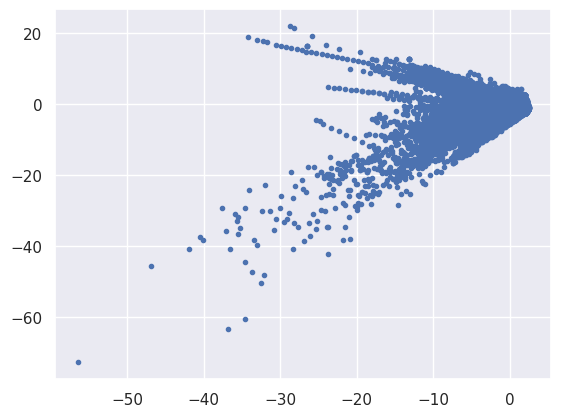

In [ ]:
plt.plot(df['V1'], df['V2'],'.')

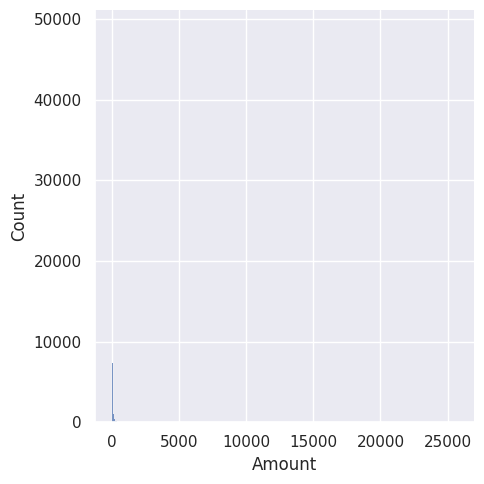

In [ ]:
sns.displot(df['Amount'])

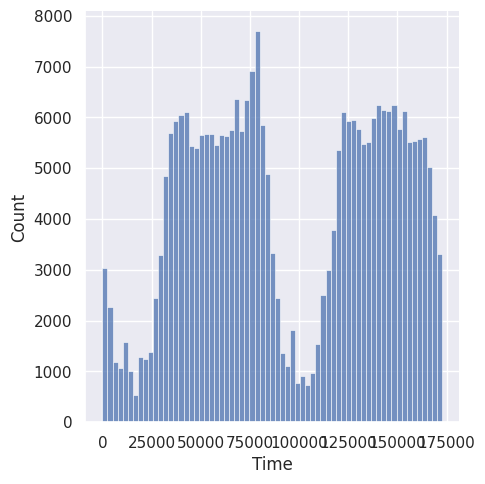

In [ ]:
sns.displot(df['Time'])

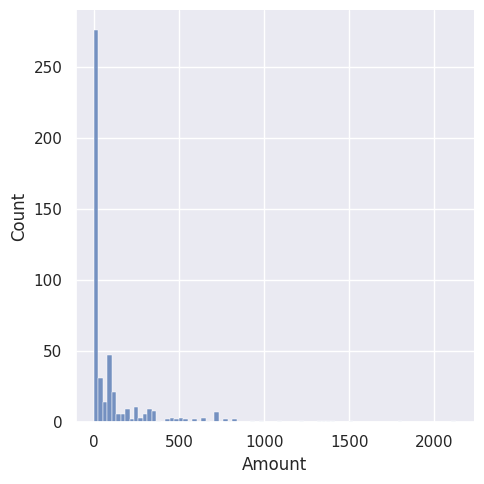

In [ ]:
sns.displot(df[df['Class'] == 1]['Amount'])

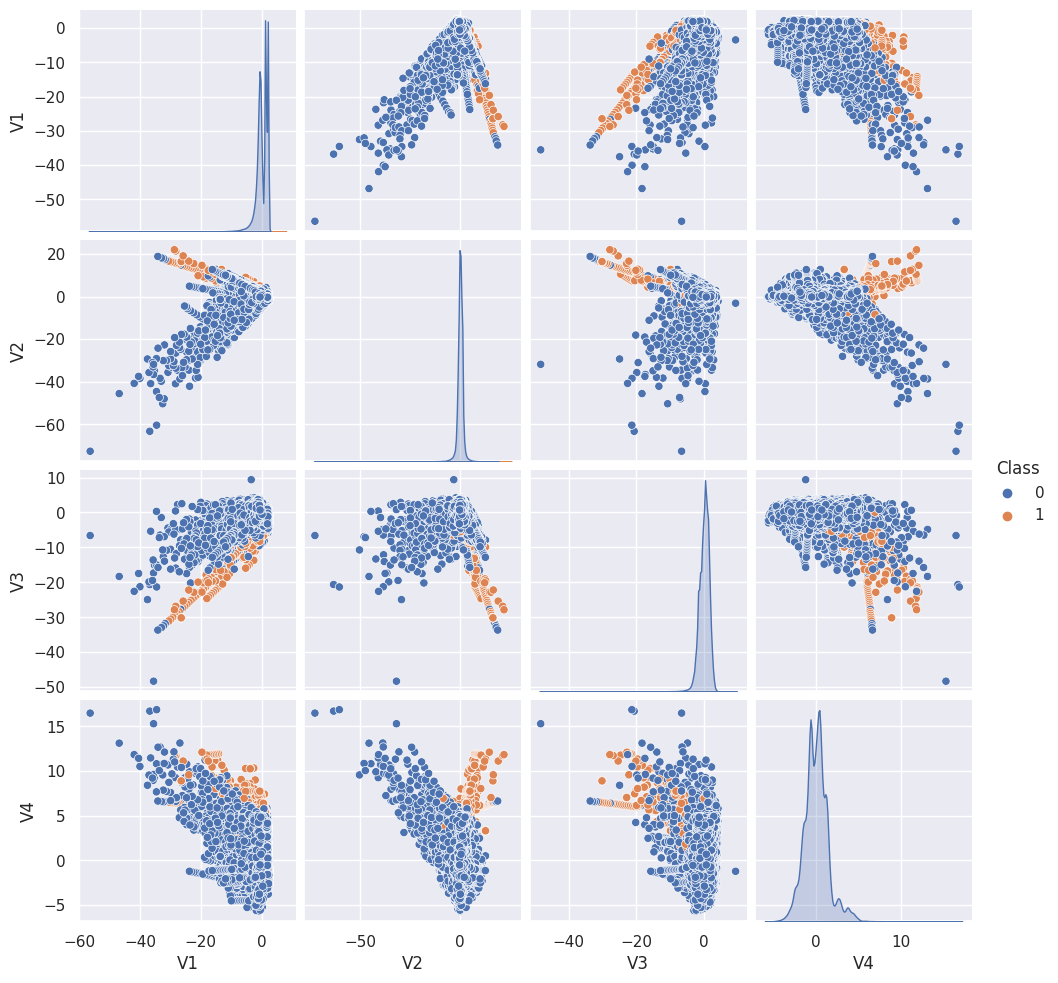

In [ ]:
new_df = df[['V1', 'V2', 'V3', 'V4','Class']]
sns.pairplot(new_df, hue="Class")

<Axes: >

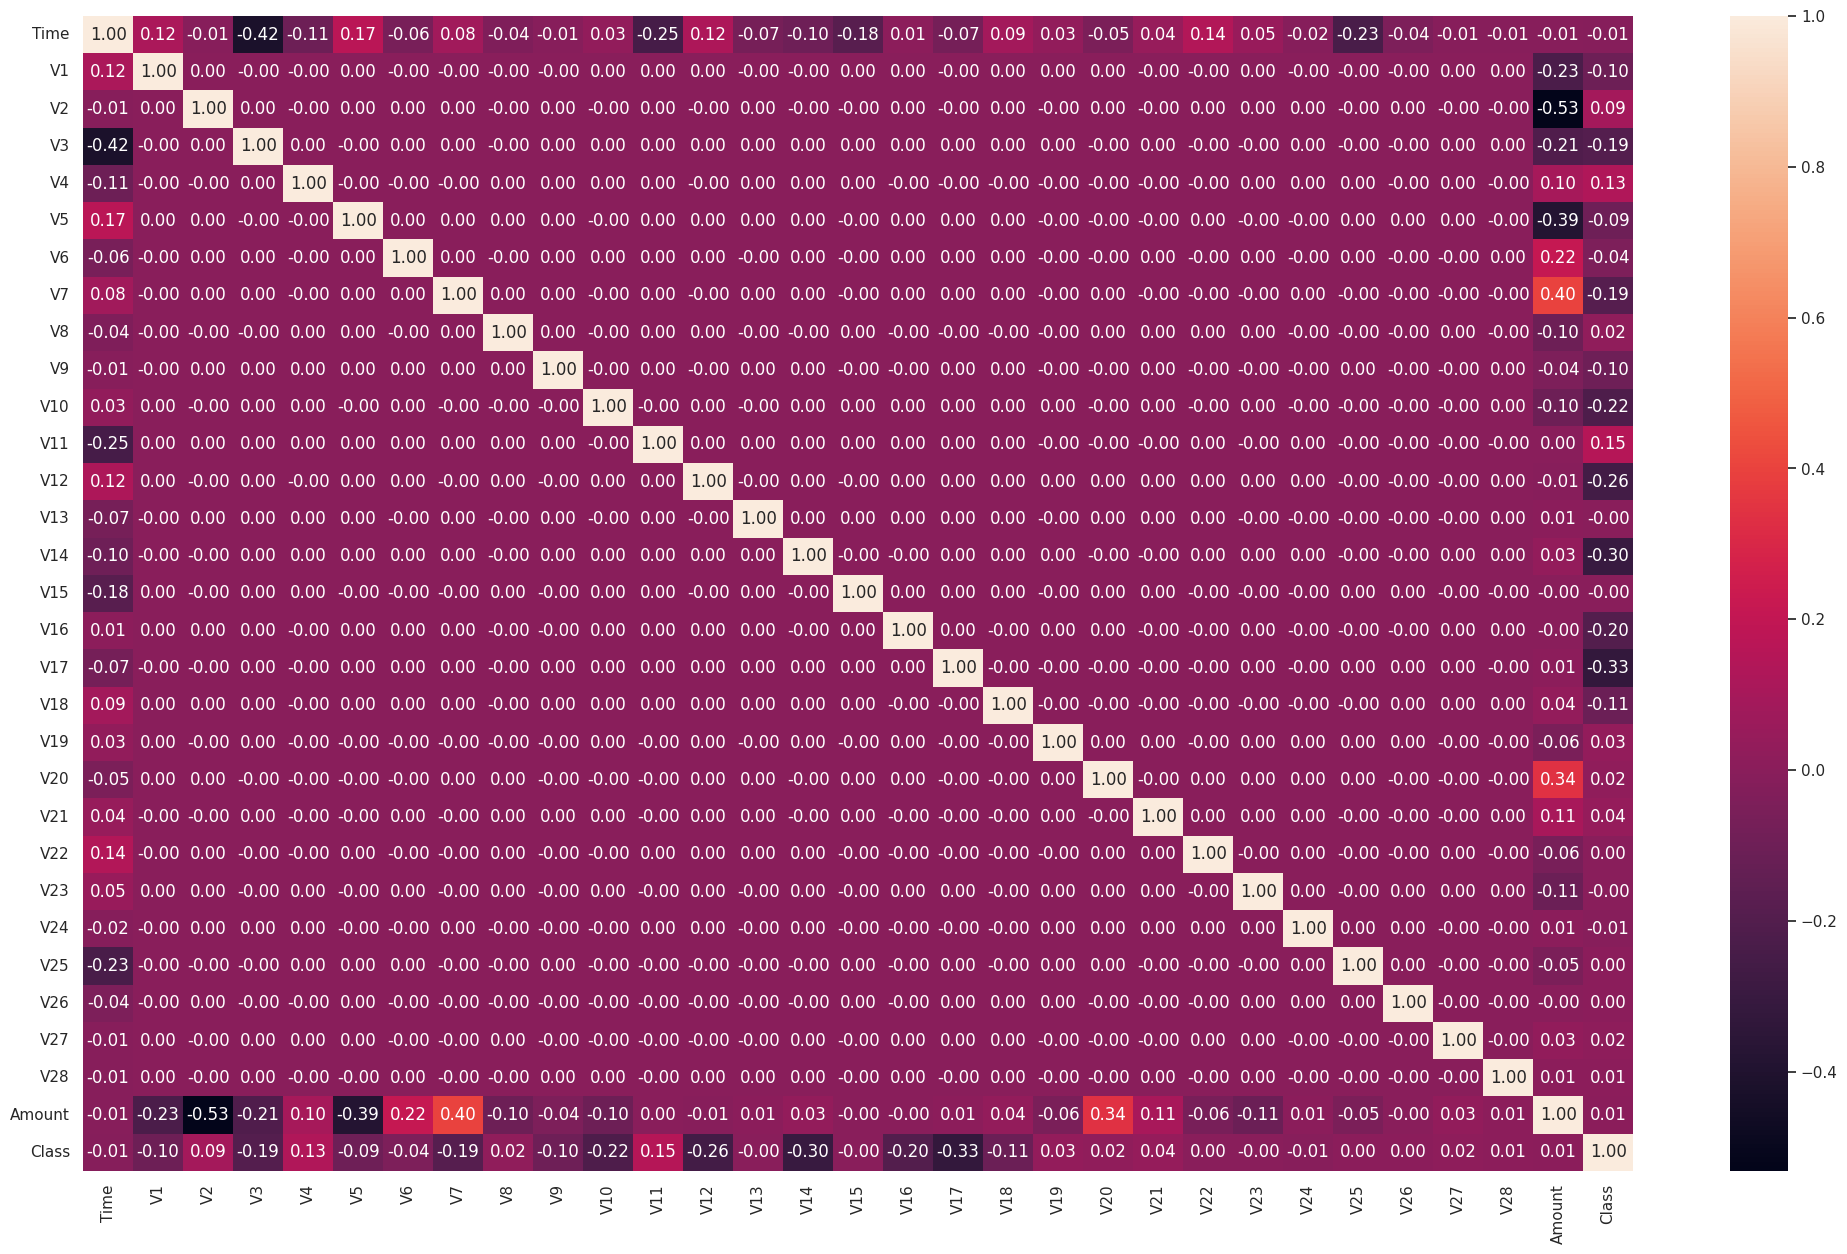

In [ ]:
plt.figure(figsize = (25,15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True,fmt=".2f")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
test_size_1=0.2
test_size_2=0.5

def create_training_sets(data):
    """
    Convert data frame to train, validation and test
    params:
        data: The dataframe with the dataset to be split
    Returns:
        train_features: Training feature dataset
        test_features: Test feature dataset
        train_labels: Labels for the training dataset
        test_labels: Labels for the test dataset
        val_features: Validation feature dataset
        val_labels: Labels for the validation dataset
    """
    # Extract the target variable from the dataframe and convert the type to float32
    ys = np.array(data["Class"]).astype("float32")

    # Drop all the unwanted columns including the target column
    drop_list = ["Class","Time"]

    # Drop the columns from the drop_list and convert the data into a NumPy array of type float32
    xs = np.array(data.drop(drop_list, axis=1)).astype("float32")

    np.random.seed(0)

    # Use the sklearn function train_test_split to split the dataset in the ratio train 80% and test 20%
    train_features, test_features, \
    train_labels, test_labels = train_test_split(xs, ys, test_size=test_size_1, stratify=ys)

    # Use the sklearn function again to split the test dataset into 50% validation and 50% test
    val_features, test_features, \
    val_labels, test_labels = train_test_split(test_features, test_labels, test_size=test_size_2, stratify=test_labels)

    return train_features, test_features, train_labels, test_labels, val_features, val_labels

In [ ]:
# Use the function to create your datasets
train_features, test_features, train_labels, test_labels, val_features, val_labels = create_training_sets(df)

print(f"Length of train_features is: {train_features.shape}")
print(f"Length of train_labels is: {train_labels.shape}")
print(f"Length of val_features is: {val_features.shape}")
print(f"Length of val_labels is: {val_labels.shape}")
print(f"Length of test_features is: {test_features.shape}")
print(f"Length of test_labels is: {test_labels.shape}")

Length of train_features is: (227845, 29)
Length of train_labels is: (227845,)
Length of val_features is: (28481, 29)
Length of val_labels is: (28481,)
Length of test_features is: (28481, 29)
Length of test_labels is: (28481,)


In [ ]:
print('Train class split')
tr_hist = np.histogram(train_labels, bins=2)[0]
print(tr_hist)
print(tr_hist[1]*1. / (tr_hist[0] + tr_hist[1]))

print('\nValidation class split')
val_hist = np.histogram(val_labels, bins=2)[0]
print(val_hist)
print(val_hist[1]*1. / (val_hist[0] + val_hist[1]))

print('\nTest class split')
test_hist = np.histogram(test_labels, bins=2)[0]
print(test_hist)
print(test_hist[1]*1. / (test_hist[0] + test_hist[1]))

Train class split
[227451    394]
0.001729245759178389

Validation class split
[28432    49]
0.0017204452090867595

Test class split
[28432    49]
0.0017204452090867595


In [ ]:
print(f"Length of train_features is: {train_features.shape}")
print(f"Length of train_labels is: {train_labels.shape}")
print(f"Length of val_features is: {val_features.shape}")
print(f"Length of val_labels is: {val_labels.shape}")
print(f"Length of test_features is: {test_features.shape}")
print(f"Length of test_labels is: {test_labels.shape}")

Length of train_features is: (227845, 29)
Length of train_labels is: (227845,)
Length of val_features is: (28481, 29)
Length of val_labels is: (28481,)
Length of test_features is: (28481, 29)
Length of test_labels is: (28481,)


Text(0.5, 1.0, 'Original Distribution of the dataset')

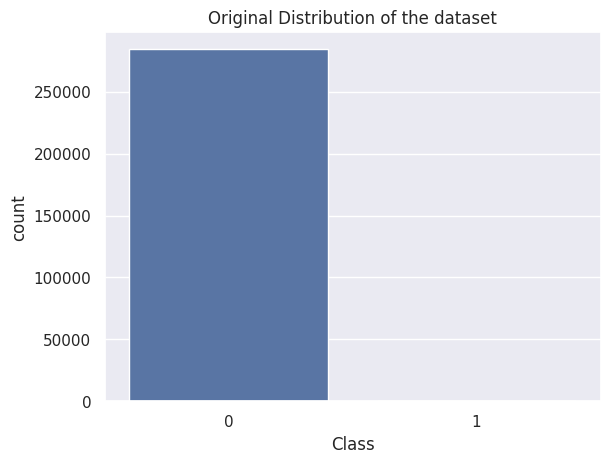

In [ ]:
sns.countplot(x=df['Class'])
plt.title('Original Distribution of the dataset')

In [ ]:
df_train = pd.DataFrame(train_features, columns = df.columns.drop(['Time','Class']))
df_train['Target'] = train_labels

In [ ]:
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Target
0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.669998,0.0
1,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595999,-0.220086,16.940001,0.0
2,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.000000,0.0
3,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.780000,0.0
4,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.959999,0.0


handle imbalanced datasets:



In [ ]:
fraud_df = df_train[df_train['Target'] == 1]


non_fraud_df = df_train[df_train['Target'] == 0].sample(n=len(fraud_df), random_state=235)

balanced_df = pd.concat([fraud_df, non_fraud_df], ignore_index=True, sort=False)

balanced_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Target
0,-7.334341,4.960892,-8.451409,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.380000,1.0
1,-5.839191,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843626,-3.494276,-13.320789,...,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,316.059998,1.0
2,-28.709229,22.057730,-27.855812,11.845013,-18.983812,6.474114,-43.557243,-41.044262,-13.320155,-24.588263,...,-22.797604,8.316276,5.466230,0.023854,-1.527145,-0.145225,-5.682338,-0.439134,0.010000,1.0
3,-1.739341,1.344521,-0.534379,3.195292,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,-2.996669,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.000000,1.0
4,0.857321,4.093912,-7.423893,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,-3.944238,...,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.000000,1.0


Text(0.5, 1.0, 'Balanced Distribution of the dataset')

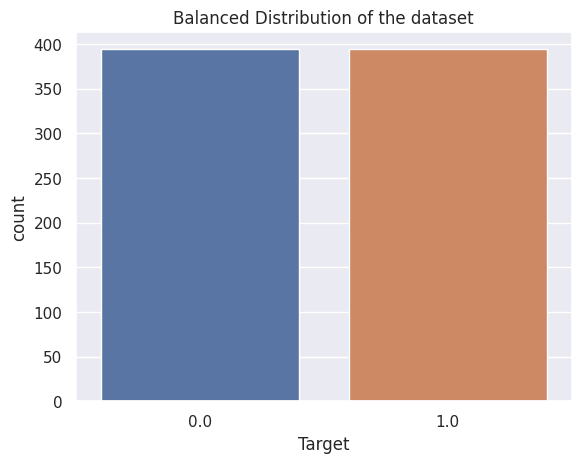

In [ ]:
sns.countplot(x=balanced_df['Target'])
plt.title('Balanced Distribution of the dataset')

In [ ]:
balanced_df.shape

(788, 30)

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(balanced_df.drop(columns = "Target"))
X_embedded.shape

(788, 2)

Text(0.5, 1.0, 'Red: 0 , Blue: 1')

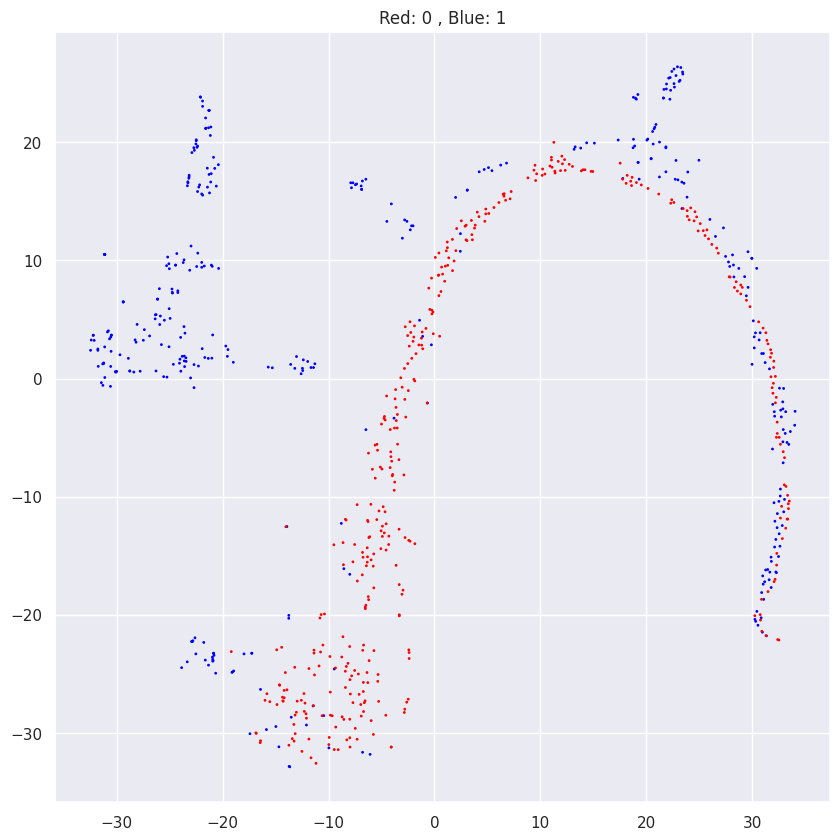

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (10,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1],
            c = balanced_df['Target'],
            s = 1,
            cmap = ListedColormap(['Red', 'Blue']),
            linewidths=1)

plt.title('Red: 0 , Blue: 1')

<Axes: >

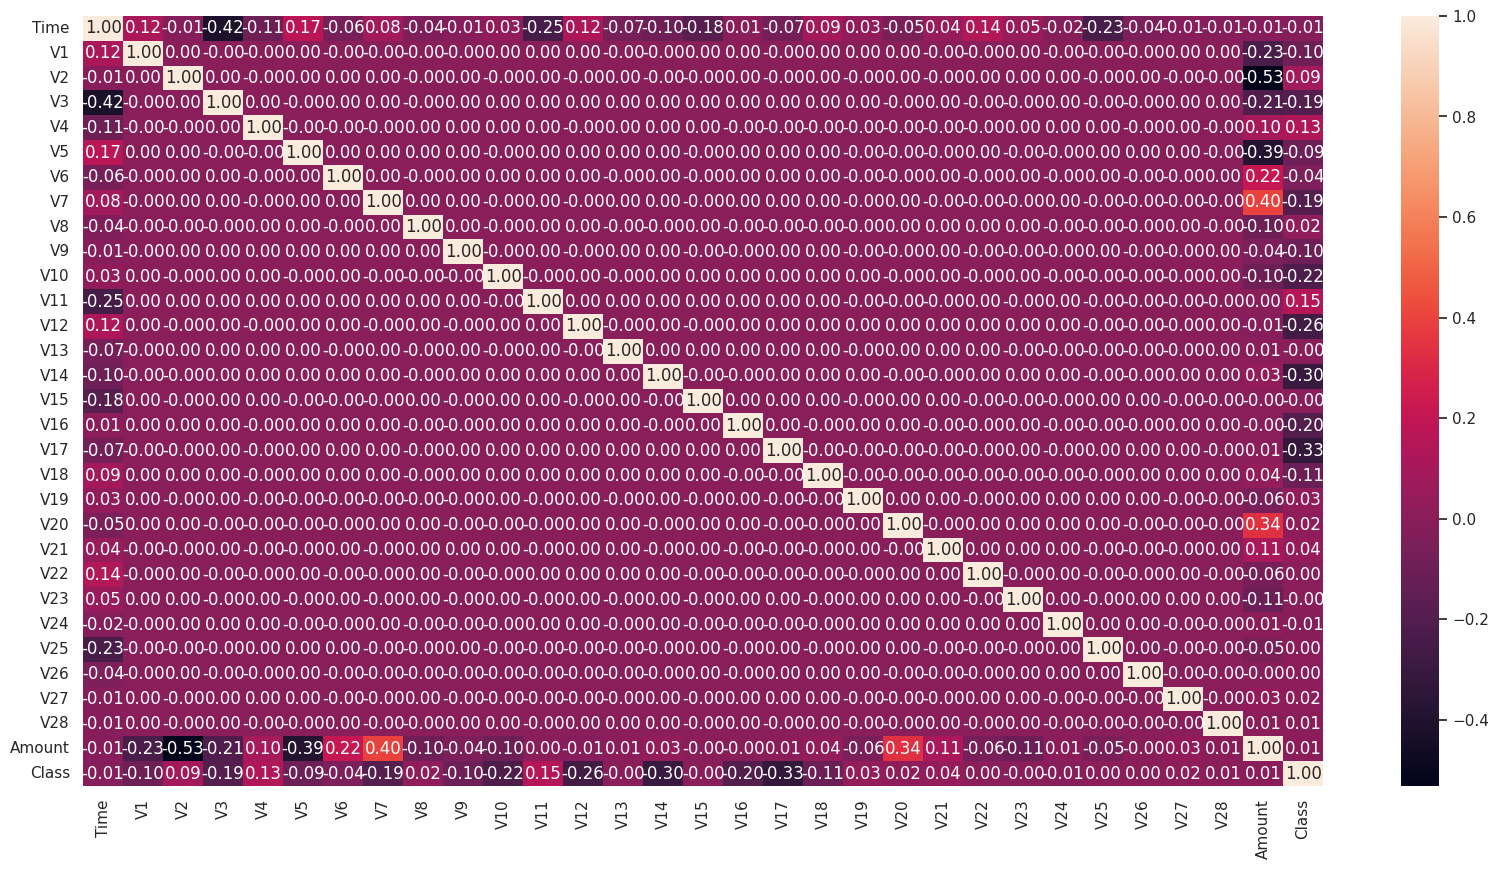

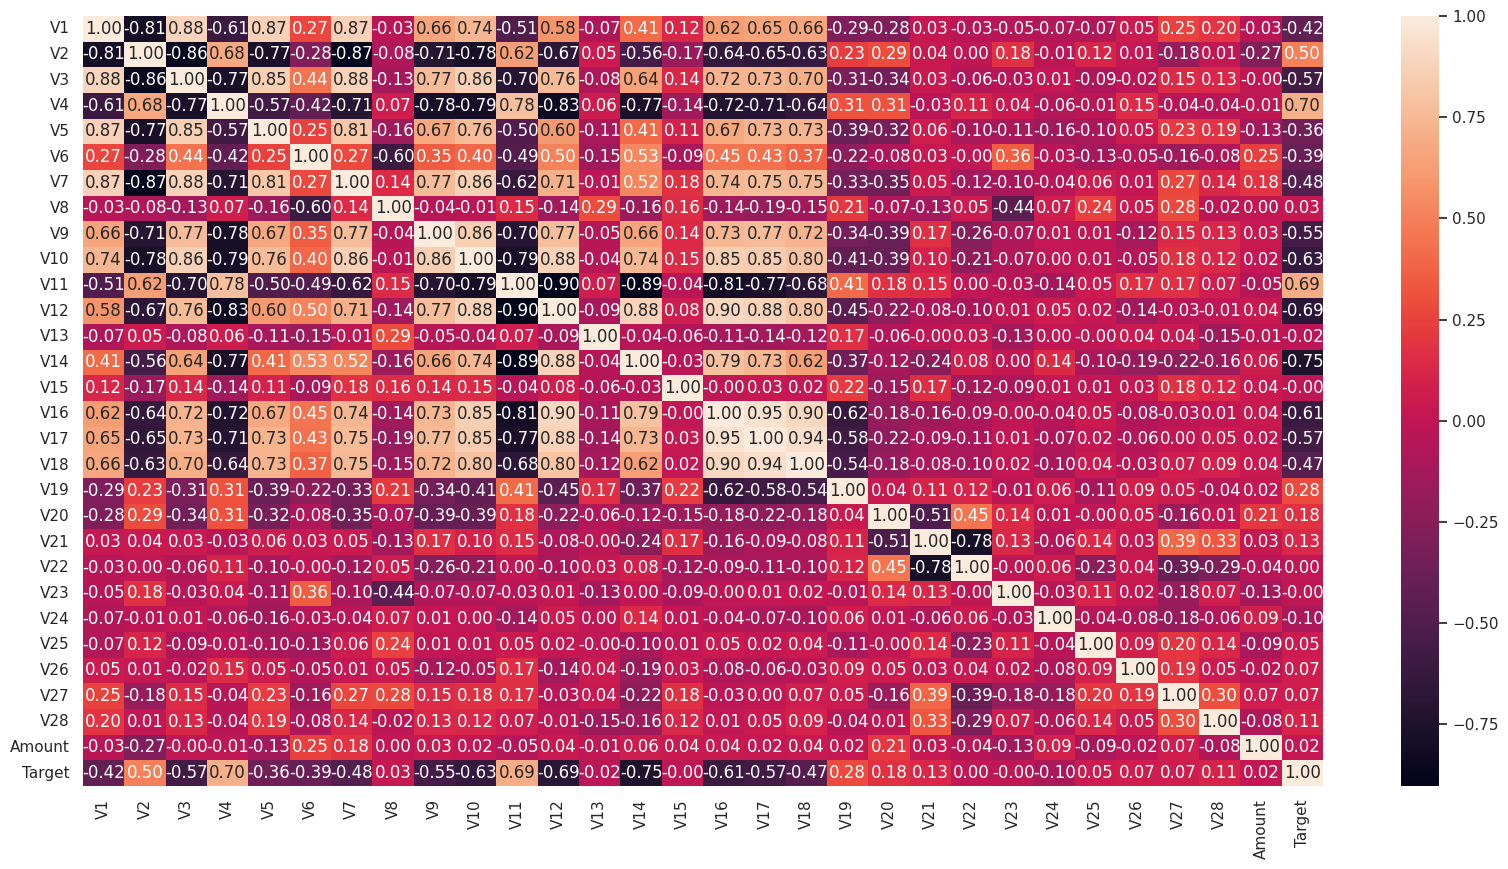

In [ ]:
# Make sure to use the subsample in the correlation

plt.figure(figsize = (20,10))
correlation_matrix_before = df.corr()
sns.heatmap(correlation_matrix_before, annot=True,fmt=".2f")

plt.figure(figsize = (20,10))
correlation_matrix_after = balanced_df.corr()
sns.heatmap(correlation_matrix_after, annot=True,fmt=".2f")

In [ ]:
balanced_df_drop = balanced_df.drop(columns=['V17','V18'])

Reducing the number of examples that make the distribution even caused the recall to go down rather than up. Let's try a different strategy, because we need a high recall.

Try using SMOTE to increase the number of positive examples.

In [ ]:
from imblearn.over_sampling import SMOTE
random_state=35

X = df.drop(['Class', 'Time'], axis=1).values
y = df['Class'].values

sm = SMOTE(random_state=random_state)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
smote_df = pd.DataFrame(X_res,columns = df.drop(['Class', 'Time'], axis=1).columns)
smote_df['Class'] = y_res
smote_df['Time'] = df['Time']

In [ ]:
artifact = lineapy.save(smote_df, 'processed_data')

In [ ]:
print(artifact.get_code())

import pandas as pd
from imblearn.over_sampling import SMOTE

file_path = "/content/drive/MyDrive/fraud_usecase/fraud.csv"
df = pd.read_csv(file_path)
mapped_class = {"'0'": 0, "'1'": 1}
df["Class"] = df["Class"].map(lambda x: mapped_class[x])
random_state = 35
X = df.drop(["Class", "Time"], axis=1).values
y = df["Class"].values
sm = SMOTE(random_state=random_state)
X_res, y_res = sm.fit_resample(X, y)
smote_df = pd.DataFrame(X_res, columns=df.drop(["Class", "Time"], axis=1).columns)
smote_df["Class"] = y_res
smote_df["Time"] = df["Time"]



In [ ]:
#X_res, y_res = X_res.astype("float32"), y_res.astype("float32")

train_features, test_features, train_labels, test_labels, val_features, val_labels = create_training_sets(smote_df)

In [ ]:
split_samples=train_features, test_features, train_labels, test_labels, val_features, val_labels

In [ ]:
artifact = lineapy.save(split_samples, 'train_test_split_samples')

In [ ]:
print(artifact.get_code())

import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

file_path = "/content/drive/MyDrive/fraud_usecase/fraud.csv"
df = pd.read_csv(file_path)
mapped_class = {"'0'": 0, "'1'": 1}
df["Class"] = df["Class"].map(lambda x: mapped_class[x])
test_size_1 = 0.2
test_size_2 = 0.5


def create_training_sets(data):
    """
    Convert data frame to train, validation and test
    params:
        data: The dataframe with the dataset to be split
    Returns:
        train_features: Training feature dataset
        test_features: Test feature dataset
        train_labels: Labels for the training dataset
        test_labels: Labels for the test dataset
        val_features: Validation feature dataset
        val_labels: Labels for the validation dataset
    """
    # Extract the target variable from the dataframe and convert the type to float32
    ys = np.array(data["Class"]).astype("float32")

    # Drop all the unwanted

In [ ]:
train_features_balanced = balanced_df.drop(['Target'], axis=1).values
train_labels_balanced = balanced_df['Target'].values

train_features_label = np.insert(train_features_balanced, 0, train_labels_balanced, axis=1)
val_features_label = np.insert(val_features, 0, val_labels, axis=1)
test_features_label = np.insert(test_features, 0, test_labels, axis=1)

np.savetxt("train.csv", train_features_label, delimiter=",")
np.savetxt("validation.csv", val_features_label, delimiter=",")


In [ ]:
## Model Training with the best Parameteres an best estimators
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn import metrics
import os
import gc
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier



model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=48, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=0.8, tree_method='exact', validate_parameters=1

              )
model.fit(train_features, train_labels, eval_set=[(val_features, val_labels)], verbose = True)

predictions = model.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predictions)
print('Valid AUC: ', metrics.auc(fpr, tpr))


[17:56:27] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-logloss:0.53566
[1]	validation_0-logloss:0.42458
[2]	validation_0-logloss:0.34538
[3]	validation_0-logloss:0.28470
[4]	validation_0-logloss:0.23979
[5]	validation_0-logloss:0.20323
[6]	validation_0-logloss:0.17368
[7]	validation_0-logloss:0.15037
[8]	validation_0-logloss:0.13068
[9]	validation_0-logloss:0.11557
[10]	validation_0-logloss:0.10184
[11]	validation_0-logloss:0.09113
[12]	validation_0-logloss:0.08219
[13]	validation_0-logloss:0.07419
[14]	validation_0-logloss:0.06728
[15]	validation_0-logloss:0.06178
[16]	validation_0-logloss:0.05716
[17]	validation_0-logloss:0.05356
[18]	validation_0-logloss:0.05007
[19]	validation_0-logloss:0.04691
[20]	validation_0-logloss:0.04372
[21]	validation_0-logloss:0.04130
[22]	validation_0-logloss:0.03901
[23]	validation_0-logloss:0.03711
[24]	validation_0-logloss:0.03562
[25]	validation_0-logloss:0.03404
[26]	validation_0-logloss:0.03274
[27]	val

In [ ]:
artifact = lineapy.save(model, 'fraud_model')

In [ ]:
print(artifact.get_code())

import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

file_path = "/content/drive/MyDrive/fraud_usecase/fraud.csv"
df = pd.read_csv(file_path)
mapped_class = {"'0'": 0, "'1'": 1}
df["Class"] = df["Class"].map(lambda x: mapped_class[x])
test_size_1 = 0.2
test_size_2 = 0.5


def create_training_sets(data):
    """
    Convert data frame to train, validation and test
    params:
        data: The dataframe with the dataset to be split
    Returns:
        train_features: Training feature dataset
        test_features: Test feature dataset
        train_labels: Labels for the training dataset
        test_labels: Labels for the test dataset
        val_features: Validation feature dataset
        val_labels: Labels for the validation dataset
    """
    # Extract the target variable from the dataframe and convert the type to float32
    ys = np.array(data["Class"]).astype("floa

In [ ]:
predictions_1 = []
for i in predictions:
    if i>0.5:
        predictions_1.append(1)
    else:
        predictions_1.append(0)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# Examine model accuracy on test data
model_eval = classification_report(test_labels, predictions_1, digits=3)
print(model_eval)

              precision    recall  f1-score   support

         0.0      1.000     0.999     0.999     28432
         1.0      0.999     1.000     0.999     28431

    accuracy                          0.999     56863
   macro avg      0.999     0.999     0.999     56863
weighted avg      0.999     0.999     0.999     56863



In [ ]:
artifact=lineapy.save(model_eval, 'fraud_model_evaluation')

In [ ]:
print(artifact.get_code())

In [ ]:
print(confusion_matrix(test_labels,predictions_1))

In [ ]:
from sklearn.metrics import f1_score
score = f1_score(test_labels,predictions_1)
print('F-Score: %.5f' % score)

In [ ]:
artifact=lineapy.save(score, "F1_Score")

In [ ]:
print(artifact.get_code())

import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

file_path = "/content/drive/MyDrive/fraud_usecase/fraud.csv"
df = pd.read_csv(file_path)
mapped_class = {"'0'": 0, "'1'": 1}
df["Class"] = df["Class"].map(lambda x: mapped_class[x])
test_size_1 = 0.2
test_size_2 = 0.5


def create_training_sets(data):
    """
    Convert data frame to train, validation and test
    params:
        data: The dataframe with the dataset to be split
    Returns:
        train_features: Training feature dataset
        test_features: Test feature dataset
        train_labels: Labels for the training dataset
        test_labels: Labels for the test dataset
        val_features: Validation feature dataset
        val_labe

In [ ]:
# Access the LineaPy artifact store.

catalog = lineapy.artifact_store()
print('artifact within the catalog\n', catalog, '\n')

artifact within the catalog
 load_data:0 created on 2023-06-16 17:47:45.796946
processed_data:0 created on 2023-06-16 17:56:13.275828
train_test_split_samples:0 created on 2023-06-16 17:56:17.456173
fraud_model:0 created on 2023-06-16 18:01:11.476537
fraud_model_evaluation:0 created on 2023-06-16 18:01:16.861015
F1-Score:0 created on 2023-06-16 18:01:22.422579 



In [ ]:
# Build an pipeline using artifacts
lineapy.to_pipeline(
    pipeline_name="fraud_usecase_pipeline",
    artifacts=["load_data", "processed_data", "train_test_split_samples", "fraud_model", "fraud_model_evaluation", "F1_Score"],
    dependencies={
        "F1_Score": {"fraud_model"},
        "fraud_model_evaluation": {"fraud_model"},
        "fraud_model":{"train_test_split_samples"},
        "train_test_split_samples":{"processed_data"},
        "processed_data":{"load_data"}
    },
    input_parameters=["file_path", "test_size_1","test_size_2","random_state"],
    output_dir="/content/drive/MyDrive/fraud_usecase/",
    framework="SCRIPT",
    #e.g: airflow, dvc, argo, kubeflow
)

SyntaxError: ignored